In [39]:
from sklearn.cluster import KMeans as lab4_kmeans
from sklearn.mixture import GaussianMixture as lab4_Gmm

# Clustering Part 2

In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

# DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


General form for points on a circle: 
$$(x, y) = (rcos\theta, rsin\theta)$$
For n such points, i<sup>th</sup> point would have $ \theta = \frac{2 \pi i}{n} $ , i = 0, 1, 2, 3, ... n-1

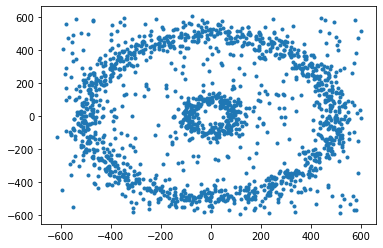

In [41]:
## write your code here
def circularData(radius, noise, n):
    dataset = []
    for i in range(n):
        x = math.cos(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        y = math.sin(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        dataset.append((x, y))
    return dataset

def uniformNoise(bound, n):
    dataset = []
    for i in range(n):
        x = np.random.uniform(-bound, bound)
        y = np.random.uniform(-bound, bound)
        dataset.append((x, y))
    return dataset

outerC = circularData(500, 35, 1000)
innerC = circularData(100, 25, 250)
noisyPts = uniformNoise(600, 400)

plt.figure()
data = pd.DataFrame(outerC)
data = data.append(innerC)
data = data.append(noisyPts)
plt.plot(data[0], data[1], '.')
plt.show()

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

[ 1. -1.  1. ... -1.  1. -1.]


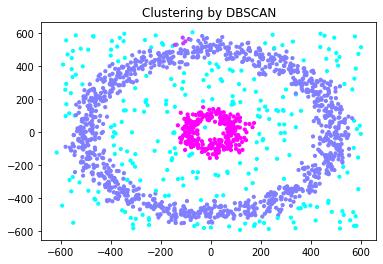

In [42]:
## Write your code here

eps = 35
minpts = 6

x = np.array(data)

def getNeighbours(x, i, eps):
    neighbours = []
    for j in range(0, len(x)):
        # If d<eps , add it to the neighbors list.
        if np.linalg.norm(x[i] - x[j]) < eps:
           neighbours.append(j)
    return neighbours

def populateCluster(x, seed, labels, cluster_id, neighbours, eps, minpts):
    labels[seed] = cluster_id
    i = 0
    while i < len(neighbours):              # sort of Breadth-First-Search
        j = neighbours[i]
        if labels[j] == -1:                 # neighbour was not a core point and has been checked
            labels[j] = cluster_id
        elif labels[j] == 0:                # undiscovered point
            labels[j] = cluster_id 
            jNeighbours = getNeighbours(x, j, eps)
            if len(jNeighbours) >= minpts:          # else it's a border point!
                neighbours = neighbours + jNeighbours 
        i = i + 1

def MyDBSCAN(eps, minpts, x):
    labels = np.zeros((x.shape[0]))
    # print(labels)
    cluster_id = 0
    for i in range(len(x)):
        if labels[i] != 0:
            continue
        neighbours = getNeighbours(x, i, eps)
        if len(neighbours) < minpts:
            labels[i] = -1         # noise:-1, not considered:0
        else:
            cluster_id = cluster_id + 1
            populateCluster(x, i, labels, cluster_id, neighbours, eps, minpts)
    return labels

# function call
pred_labels = MyDBSCAN(eps, minpts, x)

print(pred_labels)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=pred_labels, s=10, cmap = 'cool')
plt.title("Clustering by DBSCAN")
plt.show()

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

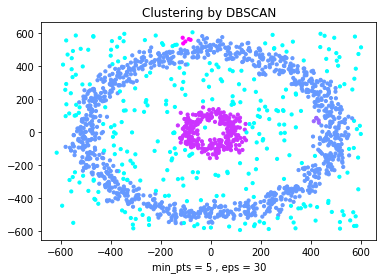

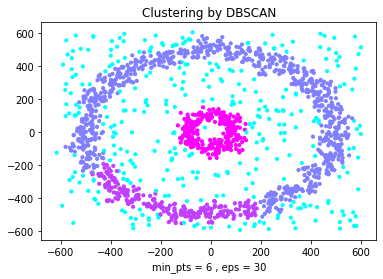

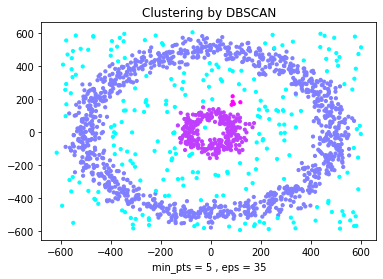

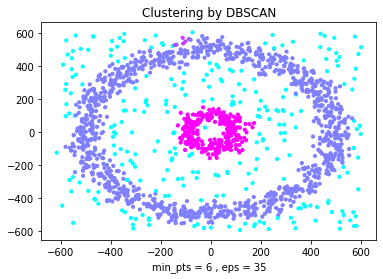

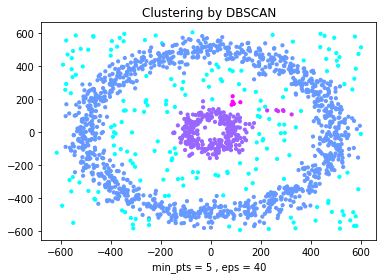

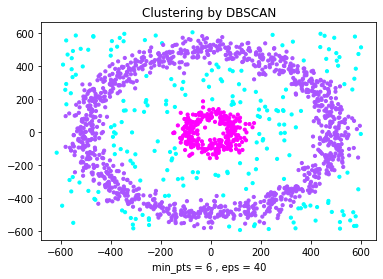

In [43]:
## write your code here
min_pts = [5, 6]
eps_rad = [30, 35, 40]
for i in eps_rad:
    for j in min_pts:
        plabels = MyDBSCAN(i, j, x)
        plt.figure()
        plt.scatter(x[:,0], x[:,1], c=plabels, s=10, cmap = 'cool');
        plt.title("Clustering by DBSCAN")
        plt.xlabel("min_pts = "+str(j)+" , eps = "+str(i))
        plt.show()


D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

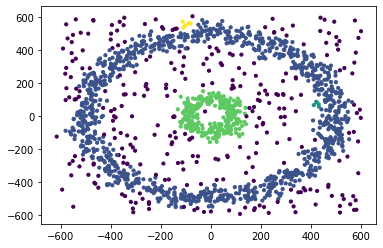

In [44]:
from sklearn.cluster import DBSCAN
## write your code here
dBSCAN = DBSCAN(eps=30, min_samples=5).fit(x)
labels = dBSCAN.labels_
plt.figure()
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)
plt.show()

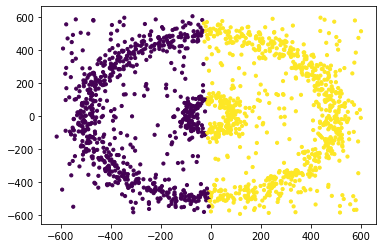

In [45]:
########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
gaussMix = GaussianMixture(n_components=2, random_state=0).fit(x)
labels = gaussMix.predict(x)
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)



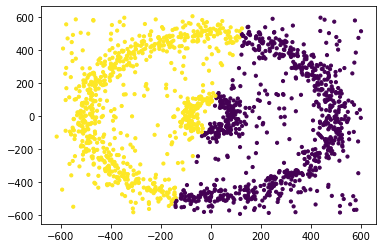

In [46]:
########################################################################
from sklearn.cluster import KMeans
## write your code here
kMeans = KMeans(n_clusters=2, random_state=0).fit(x)
y = kMeans.fit_predict(x)
labels = kMeans.predict(x)
plt.scatter(x[:,0], x[:,1], s=10, c=labels)

# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of probabilityof all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

400
2
2
Iteration  0


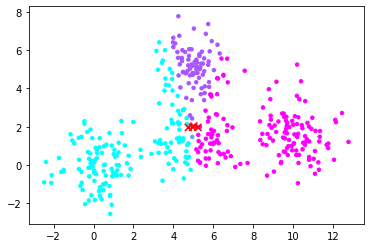

Iteration  1


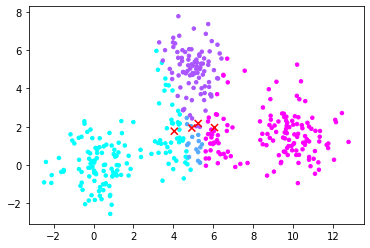

Iteration  2


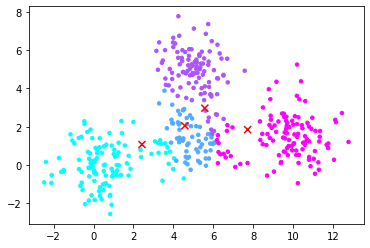

Iteration  3


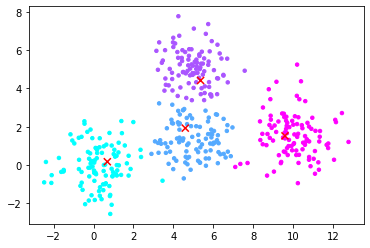

Iteration  4


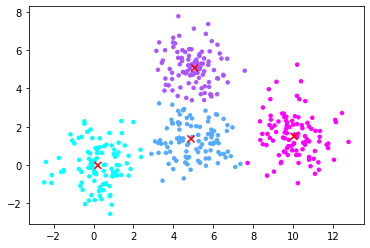

Iteration  5


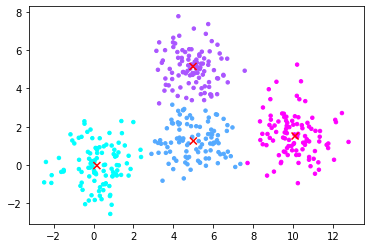

Iteration  6


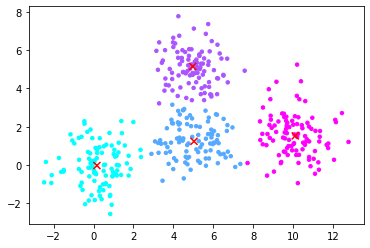

Iteration  7


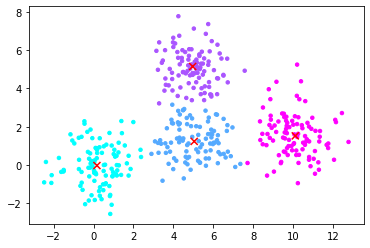

Iteration  8


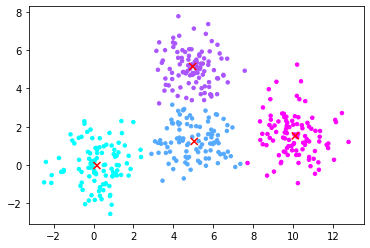

Iteration  9


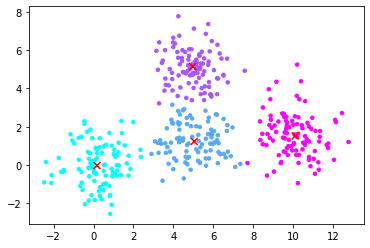

Iteration  10


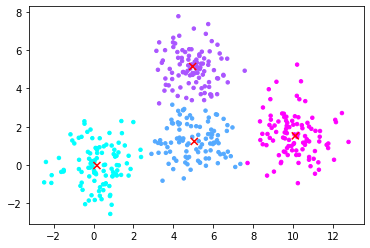

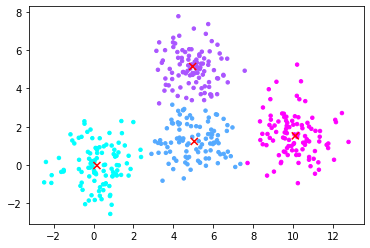

In [47]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

### n-> no of clusters  c->no. of cluster   b-> fuzzification paramter  p-> point
d1 = np.random.multivariate_normal((0.5, 0.0), np.identity(2), 100)
d2 = np.random.multivariate_normal((5.0, 5.0), np.identity(2), 100)
d3 = np.random.multivariate_normal((5.0, 1.0), np.identity(2), 100)
d4 = np.random.multivariate_normal((10.0, 1.5), np.identity(2), 100)
zeroarr = np.zeros(100)
onearr = np.ones(100)
twoarr = 2*onearr
threearr = 3*onearr
# concatenate all this to form an unlabelled dataset
real_labels = np.concatenate((zeroarr, onearr, twoarr, threearr))
data = np.concatenate((d1,d2,d3,d4))

class FuzzyC:
    # func for euclidean distance
    def dist(self, a, b):
        d = (a[1] - b[1])**2 + (a[0] - b[0])**2
        return d

    # initialization parameters
    def __init__(self, c, data):
        self.data = data
        self.b = 2              # fuzzification parameter
        self.n = len(data)
        self.c = c
        self.p=len(data[0])
        self.max_iter=100

    # initialize the probabilitymatrix
    def initialize_probability_matrix(self, n, c):
        prob_mat = list()
        # generate c random numbers in [0,1), sum them and divide (w.r.t. each point) to make the values add up to 1

        ## 0.2  0.5  0.9
        ## sum = 1.6
        ### 0.125 0.3125  0.5625 
        ### new sum=1
        for i in range(n):
            random_list = [random.random() for x in range(c)]
            summation = sum(random_list)
            for i in range(len(random_list)):
                random_list[i] = random_list[i]/summation
            prob_mat.append(random_list)
        return prob_mat
    
    # update centroids 
    def update_centroid(self, prob_mat):
        data = self.data
        centroids = {}
        for j in range(self.c):                                 # consider jth cluster
            temp=[]
            for k in range(self.p):                             # w.r.t each feature
                add = 0
                for i in range(self.n):                         # get sum(p^b)
                    add = add + prob_mat[i][j]**self.b
                x = 0
                for i in range(self.n):                         # sum(x * p^b)
                    x = x + (prob_mat[i][j]**self.b)*(data[i][k])
                val = x/add
                temp.append(val)
            centroids[j] = temp
        return centroids

    # update probabilitymatrix
    def update_probability_matrix(self, prob_mat,centroids):
        ratio = float(2/(self.b-1))
        data = self.data
        for i in range(self.n):
            distances = list()
            for j in range(self.c):
                distances.append(self.dist(data[i],centroids[j]))
            for j in range(self.c):
                den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(self.c)])
                prob_mat[i][j] = float(1/den)
        return prob_mat

    # labelling based on final clustering
    def find_cluster(self,prob_mat):
        clusters=list()
        for i in range(self.n):
            max_val, idx = max((val, idx) for (idx, val) in enumerate(prob_mat[i]))
            clusters.append(idx)
        return clusters
    
    # chnage in probability is less than threshold  value
    def check(self,prev_mat,prob_mat):
        diff=0
        for i in range(self.n):
            for j in range(self.c):                
                diff+=prev_mat[i][j]-prob_mat[i][j]  ## sum of differences between the values
        if(diff<0.01):
            return True
        return False
    
    # main thing here!!!!!
    def fuzzy_c_mean(self):
        print(self.n)
        print(self.p)
        print(self.b)
        prob_mat=self.initialize_probability_matrix(self.n,self.c)
        for i in range(self.max_iter):
            centroids=self.update_centroid(prob_mat)
            prev_mat=prob_mat
            prob_mat=self.update_probability_matrix(prob_mat,centroids)
            cluster=self.find_cluster(prob_mat)
            if i<=10:
                self.showGraphs(cluster, centroids, i)
            if(self.check(prev_mat,prob_mat))<0.01:
                print(i)
                break
        return cluster,centroids
    
    def showGraphs(self, clusters, centroids, i):
        print("Iteration ",i)
        plt.figure()
        plt.scatter(self.data[:,0], self.data[:,1], c=clusters, s=12, cmap="cool")
        x = []
        y = []
        for i in range(len(centroids)):
            cent = centroids[i]
            x.append(cent[0])
            y.append(cent[1])
        plt.scatter(x, y, marker='x', color='r', s=50*np.ones(len(centroids))) 
        plt.show()
        

fcm = FuzzyC(4, data)
clusters, centroids = fcm.fuzzy_c_mean()
x = []
y = []
for i in range(len(centroids)):
    cent = centroids[i]
    x.append(cent[0])
    y.append(cent[1])

plt.figure()
plt.scatter(data[:,0], data[:,1], c=clusters, s=12, cmap="cool")
plt.scatter(x, y, marker='x', color='r', s=50*np.ones(len(centroids)))
plt.show()



# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [48]:
from cmath import inf
from turtle import position


def Euclidian_Dist(x,y):
  return ((x[0]-y[0])**2+(x[1]-y[1])**2)**0.5

def Dist_mat(X):
 ## write your code here
  dist_mat=np.empty(shape=(X.shape[0],X.shape[0]))
  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      dist_mat[i][j]=Euclidian_Dist(X[i,:],X[j,:])
  for i in range(X.shape[0]):
    dist_mat[i][i]=inf
  return dist_mat

def combine(X,cluster):
  dist_mat=Dist_mat(X=X)
  points=np.where(dist_mat == np.amin(dist_mat))[0]
  minx=points[0]
  miny=points[1]
  if(minx>miny):
    minx,miny=miny,minx
  cluster.append([minx,miny])
  X[minx]=0.5*(X[minx]+X[miny])
  X=np.delete(X,miny,0)
  return X,cluster


In [49]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
import plotly.figure_factory as ff
## write your code here
cluster=[]
print(X)
while X.shape!=(1,2):
  X1=X.transpose()
  lab=np.linspace(1,X1.shape[1],X1.shape[1])
  fig = ff.create_dendrogram(X1.T, labels=lab)
  fig.update_layout(width=800, height=300)
  fig.show()
  X,cluster = combine(X,cluster)
  print("Combined Points",cluster[-1]+np.ones((1,2)))


  print('\nMean of clusters after every iteration: \n\n',X)
print('\ncluster combination order: \n\n',cluster+np.ones((len(cluster),2)))

## validate from inbuilt Dendogram


[[1.  1. ]
 [2.  1. ]
 [5.  4. ]
 [6.  5. ]
 [6.5 6. ]]


Combined Points [[1. 2.]]

Mean of clusters after every iteration: 

 [[1.5 1. ]
 [5.  4. ]
 [6.  5. ]
 [6.5 6. ]]


Combined Points [[3. 4.]]

Mean of clusters after every iteration: 

 [[1.5  1.  ]
 [5.   4.  ]
 [6.25 5.5 ]]


Combined Points [[2. 3.]]

Mean of clusters after every iteration: 

 [[1.5   1.   ]
 [5.625 4.75 ]]


Combined Points [[1. 2.]]

Mean of clusters after every iteration: 

 [[3.5625 2.875 ]]

cluster combination order: 

 [[1. 2.]
 [3. 4.]
 [2. 3.]
 [1. 2.]]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [50]:
# !pip install idx2numpy

In [51]:
import idx2numpy
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
img_path = r"C:\Users\Asus\Documents\GitHub\PRML-Lab\Lab 07\t10k-images-idx3-ubyte"
label_path = r"C:\Users\Asus\Documents\GitHub\PRML-Lab\Lab 07\t10k-labels-idx1-ubyte"

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here


(1954, 784)
784


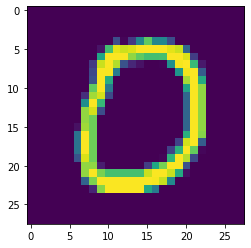

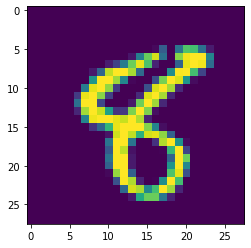

In [52]:
id_0 = np.where(labels==0)
id0 = id_0[0]
Im_0 = Images[id0,:,:]
label_0=labels[id0]
plt.figure()
plt.imshow(Im_0[1,:,:])

id_8=np.where(labels==8)
id8=id_8[0]
Im_8=Images[id8,:,:]
label_8=labels[id8]
plt.figure()
plt.imshow(Im_8[1,:,:])

data=np.concatenate((Im_0, Im_8))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
# print(data.shape)
G_lab=np.concatenate((label_0,label_8))

print(data.shape)
# just for checking

# plt.figure()
# plt.imshow(im)
print(28*28)

Use the K-means clustering algorithm from the last lab to form the clusters

In [53]:
from sklearn import metrics
kmeans = lab4_kmeans(2)
kmeans.fit(data)

pred_lab=kmeans.predict(data)
print(pred_lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1 1 1 ... 0 0 0]
performance= 0.7387783429447129


Use the GMM clustering algorithm from the last lab to form the clusters

In [54]:

gmm=lab4_Gmm(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)
gmm.fit(data)
pred_lab=gmm.predict(data)
print(pred_lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

Initialization 0
  Iteration 10
Initialization converged: True
[0 0 0 ... 0 0 0]
performance= 0.1213186660952875
